## Content

1. [User Quafu cloud API](#User-Quafu-cloud-API)
2. [Initiate session](#Initiate-session)
3. [Methods](#Methods)
4. [VQE ansatz](#VQE-ansatz)
5. [Parameterized Quantum Circuit](#Parameterized-Quantum-Circuit)
6. [Results 3 qubits](#Results-3-qubits)
7. [Results 6 qubits](#Results-6-qubits)    
8. [Results 13 qubits](#Results-13-qubits)

### User Quafu cloud API

In [1]:
token_api = ''

### Initiate session

In [2]:
from quafu import User
user = User(token_api)
user.save_apitoken()

### Methods

In [3]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from quafu import Task
from quafu import QuantumCircuit

### VQE ansatz

In [4]:
def pauli_z_ansatz(param, nb_qubits):
    
    x = param
    pqc = QuantumCircuit(nb_qubits)
    pos = [i  for i in range(0, len(x), nb_qubits)]
    s = len(pos)

    for i in range(0, len(pos)):
        
        if i % 2 == 0:
            for j in range(nb_qubits):
                pqc.ry(j, x[pos[i] + j])
        
        if i % 2 != 0:
            
            for j in range(nb_qubits):
                pqc.rz(j, x[pos[i] + j])
            
            if i != s - 1:
                for j in reversed(range(1, nb_qubits)):
                    pqc.cnot(j - 1, j)

    measures = list(range(nb_qubits))
    pqc.measure(measures)

    return pqc

### Parameterized Quantum Circuit

Optimal parameters obtained from qiskit.

In [5]:
x_3_fd = [2.907e+00, 3.897e+00, 3.470e+00, 5.240e+00, 6.135e+00,
          1.466e+00,4.642e+00, 2.641e+00, 3.166e+00,3.544e+00,
          4.398e+00, 4.638e+00]

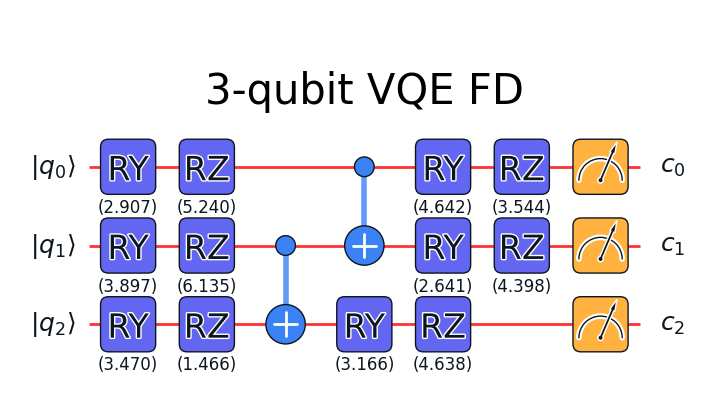

In [6]:
vqe_3_fd = pauli_z_ansatz(x_3_fd, 3)
vqe_3_fd.plot_circuit(title='3-qubit VQE FD')

In [7]:
x_3_ng = [3.163e+00,  6.421e+00,  3.146e+00, 2.712e+00, 3.025e+00, 
          5.051e+00,  3.372e+00,  6.006e+00, 6.377e+00, 3.241e+00, 
          4.666e+00,  3.472e+00]

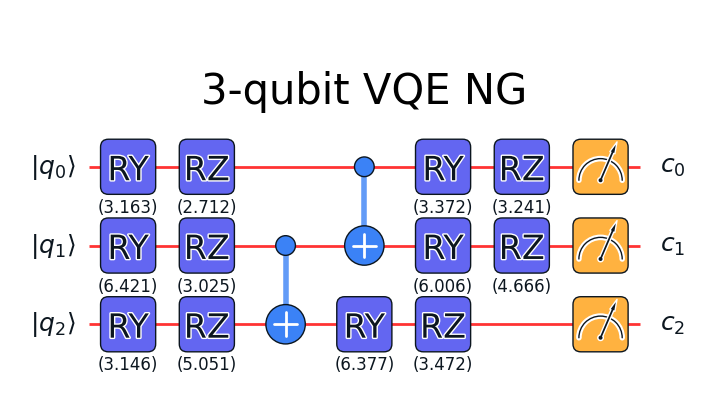

In [8]:
vqe_3_ng = pauli_z_ansatz(x_3_ng, 3)
vqe_3_ng.plot_circuit(title='3-qubit VQE NG')

### Results 3 qubits

#### Quantum Processor Unit (QPU)

In [9]:
available_backends = user.get_available_backends()

system_name	 qubits	 status
ScQ-P10   	 10   	 Online
ScQ-P18   	 18   	 Online
ScQ-P136  	 136  	 Online
ScQ-P102  	 102  	 Maintenance
ScQ-P10C  	 10   	 Online
ScQ-XXX   	 2    	 Offline


In [10]:
# Options: ScQ-P136, ScQ-P21, ScQ-P18, ScQ-P10 
backend_name = "ScQ-P18"
task = Task()
task.config(backend=f"{backend_name}", shots=1000, compile=True)
job_name = f"vqe_3_fd_{backend_name}"
res_vqe_3_fd = task.send(vqe_3_fd, name=job_name, wait=True)

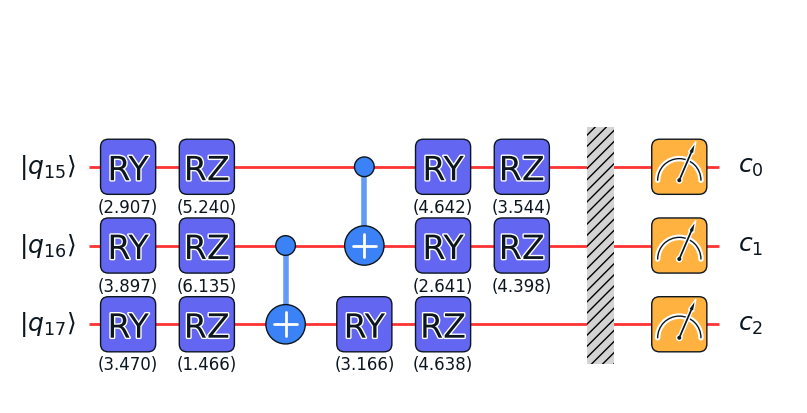

In [11]:
res_vqe_3_fd.transpiled_circuit.plot_circuit()

OrderedDict([('000', 85), ('010', 56), ('011', 364), ('100', 85), ('101', 31), ('110', 56), ('111', 323)])


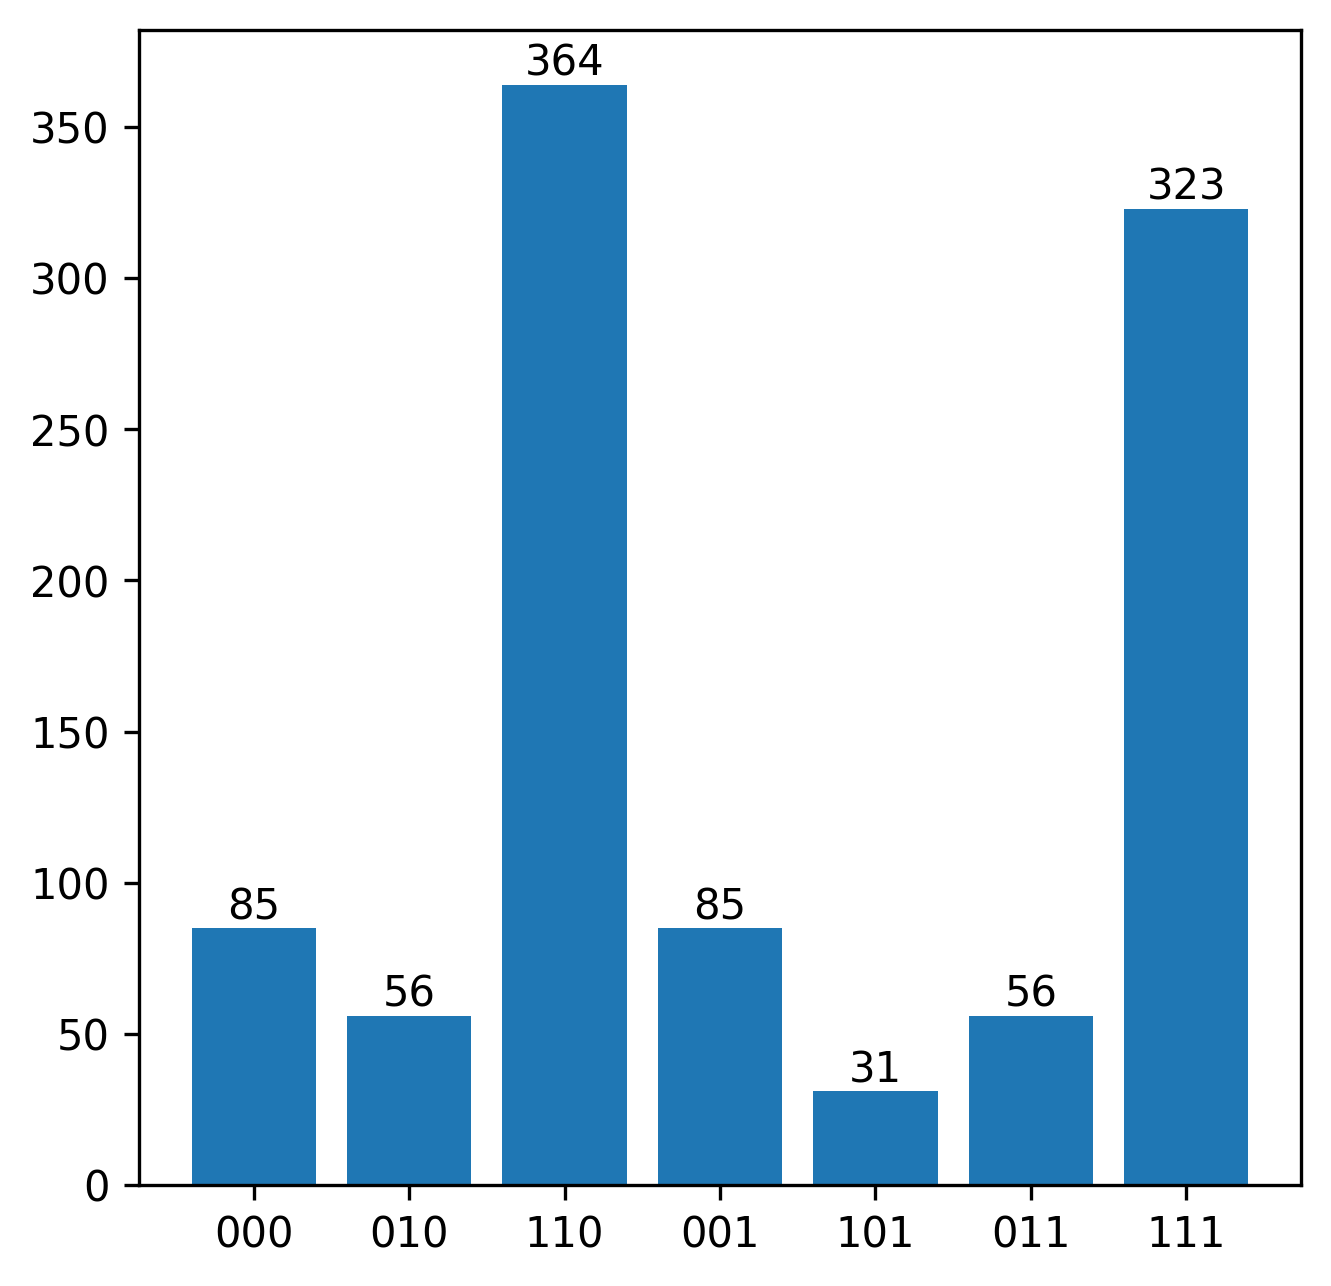

In [12]:
res_dict_3_fd = res_vqe_3_fd.counts
print(res_dict_3_fd)
plt.figure(figsize=(5,5), dpi=300)
little_endian = [s[::-1] for s in res_dict_3_fd.keys()]
counts = plt.bar(range(len(res_dict_3_fd)), list(res_dict_3_fd.values()), align='center')
plt.bar_label(counts)
plt.xticks(range(len(res_dict_3_fd)), list(little_endian))
plt.show()

In [13]:
job_name = f"vqe_3_ng_{backend_name}"
res_vqe_3_ng = task.send(vqe_3_ng,name=job_name, wait=True)

OrderedDict([('000', 42), ('001', 40), ('010', 40), ('011', 814), ('100', 15), ('101', 33), ('110', 3), ('111', 13)])


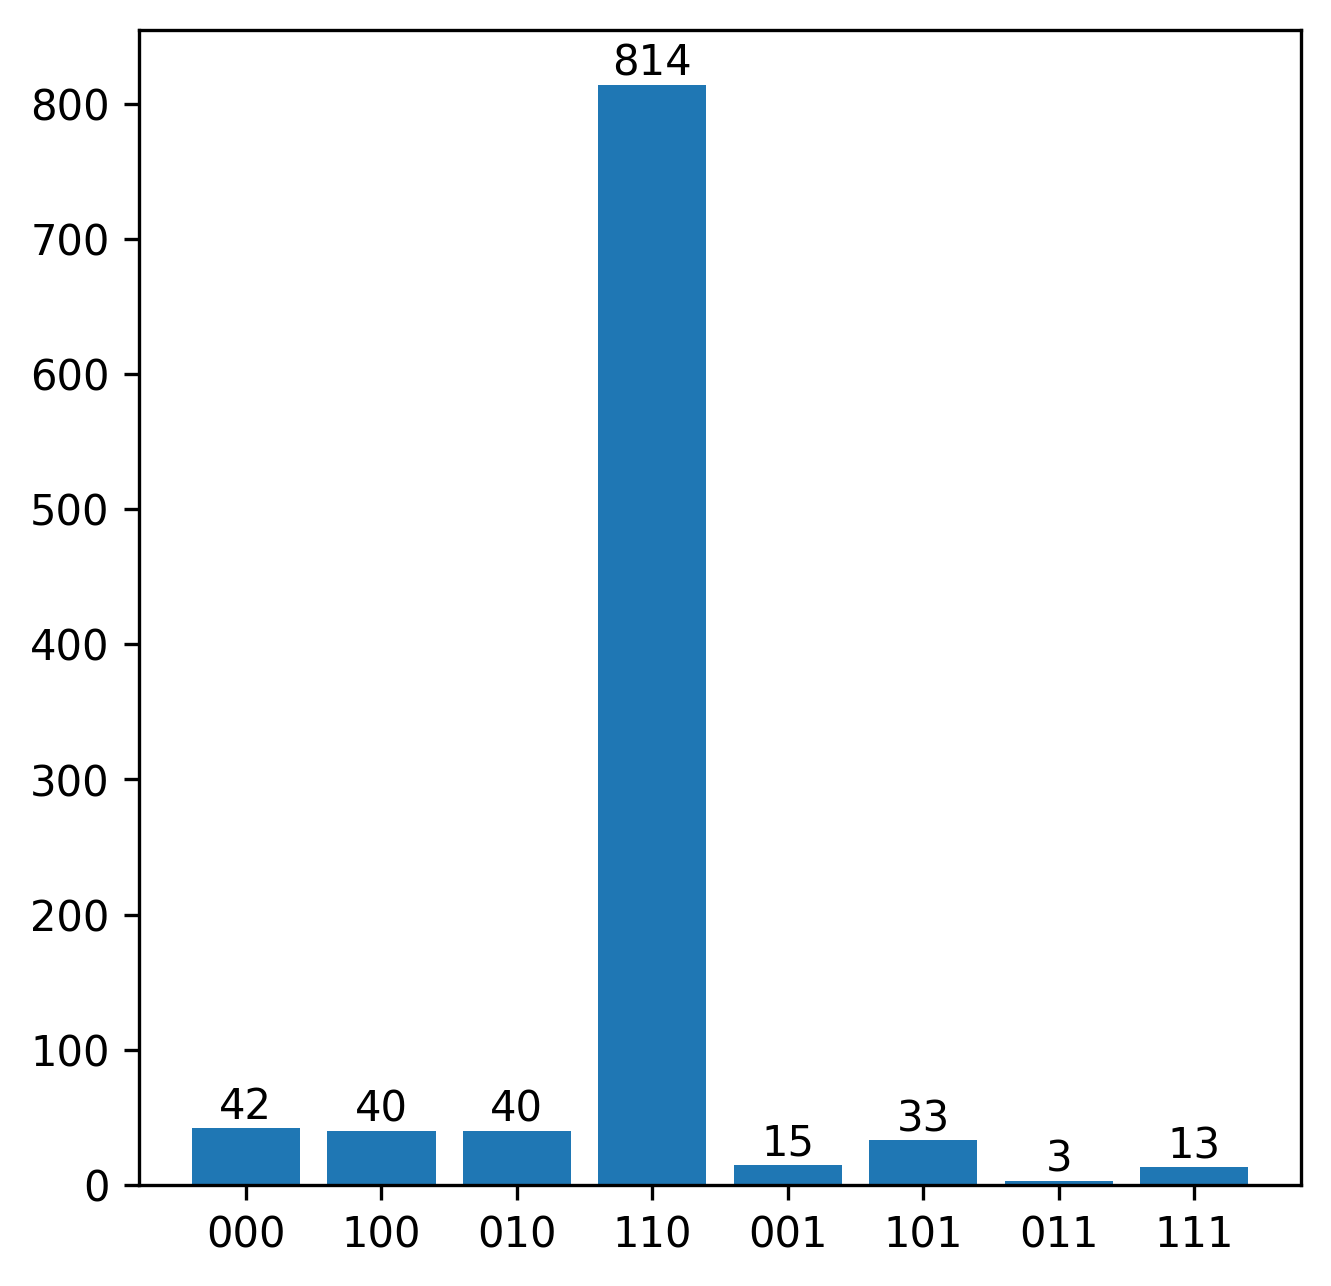

In [14]:
res_dict_3_ng = res_vqe_3_ng.counts
print(res_dict_3_ng)
plt.figure(figsize=(5,5), dpi=300)
little_endian = [s[::-1] for s in res_dict_3_ng.keys()]
counts = plt.bar(range(len(res_dict_3_ng)), list(res_dict_3_ng.values()), align='center')
plt.bar_label(counts)
plt.xticks(range(len(res_dict_3_ng)), list(little_endian))
plt.show()

### Results 6 qubits

In [15]:
x_6_ng = [6.26893598,  6.15797434,  6.314182  ,  3.22129014,  6.31107822,
          3.25553103,  2.30048382,  5.35295085,  0.67845075,  1.32445131,
          3.96238379,  1.21979175,  0.98661383,  2.97784466,  6.1847254 ,
          3.0787343 ,  3.27794872,  3.24865384,  4.54424267, -0.74492546,
          4.17659626, -0.10568444,  2.7601689 ,  5.30162617]

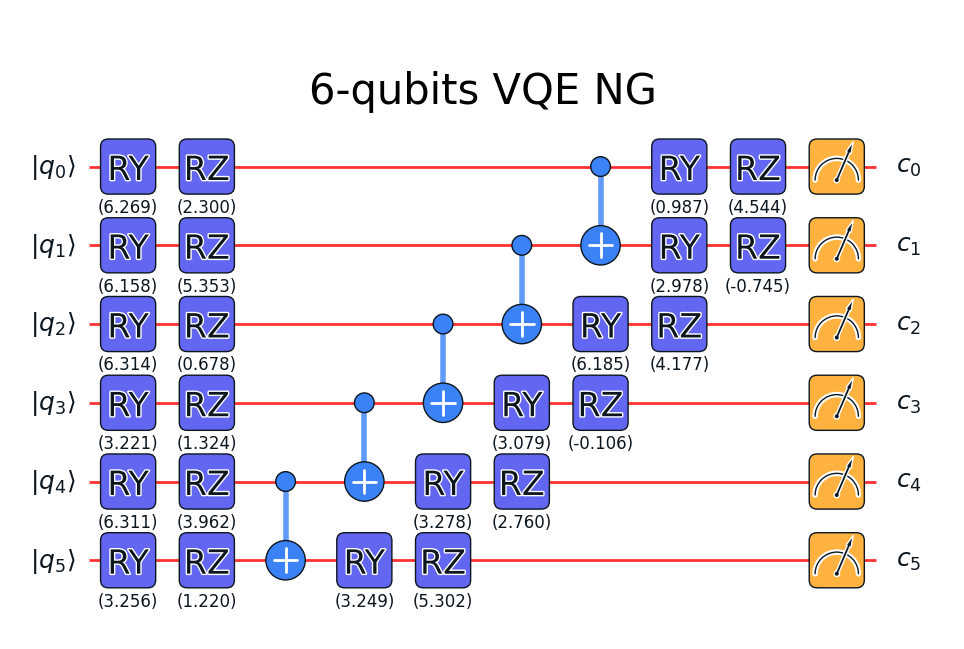

In [16]:
vqe_6_ng = pauli_z_ansatz(x_6_ng, 6)
vqe_6_ng.plot_circuit(title='6-qubits VQE NG')

#### Quantum Processor Unit (QPU)

In [17]:
available_backends = user.get_available_backends()

system_name	 qubits	 status
ScQ-P10   	 10   	 Online
ScQ-P18   	 18   	 Online
ScQ-P136  	 136  	 Online
ScQ-P102  	 102  	 Maintenance
ScQ-P10C  	 10   	 Online
ScQ-XXX   	 2    	 Offline


In [38]:
backend_name = "ScQ-P18"
task = Task()
task.config(backend=f"{backend_name}", shots=1000, compile=True)

In [39]:
job_name = f"vqe_6_ng_{backend_name}"
res_vqe_6_ng = task.send(vqe_6_ng,name=job_name, wait=True)

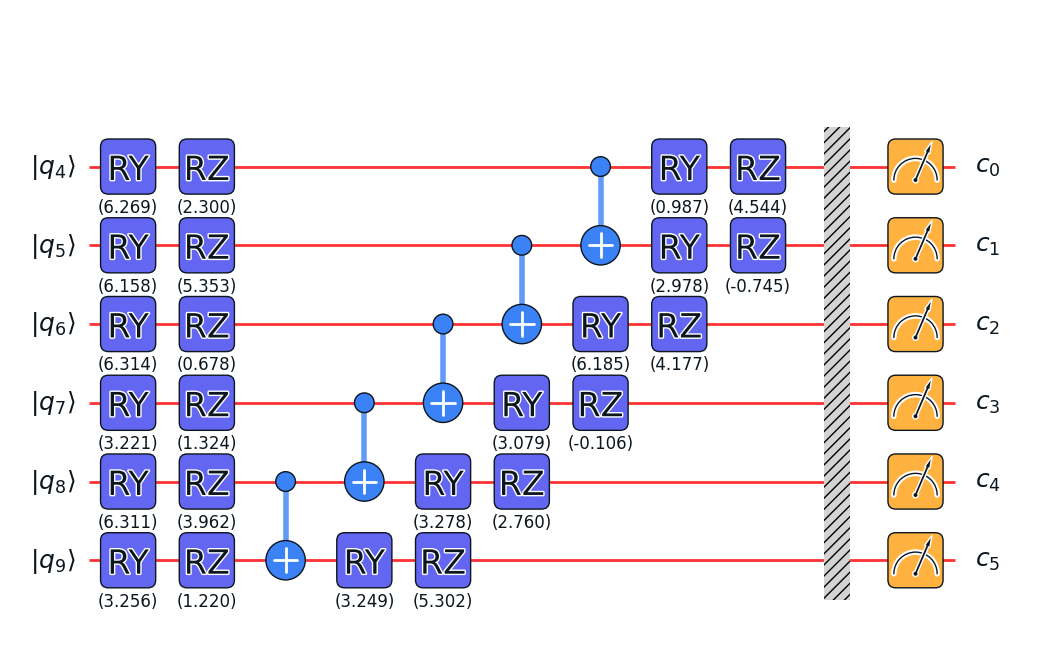

In [40]:
res_vqe_6_ng.transpiled_circuit.plot_circuit()

In [41]:
bit_str = max(res_vqe_6_ng.counts, key=res_vqe_6_ng.counts.get)
prob = res_vqe_6_ng.counts[bit_str]
print((bit_str, prob))

('010000', 612)


OrderedDict([('000010', 3), ('001000', 13), ('001001', 1), ('001010', 1), ('001101', 1), ('001110', 3), ('010000', 612), ('010011', 15), ('010100', 17), ('010110', 80), ('010111', 8), ('011010', 7), ('011100', 12), ('011110', 5), ('100000', 8), ('100010', 1), ('100011', 1), ('101000', 3), ('101111', 1), ('110000', 162), ('110001', 11), ('110100', 5), ('110110', 27), ('111000', 1), ('111111', 2)])


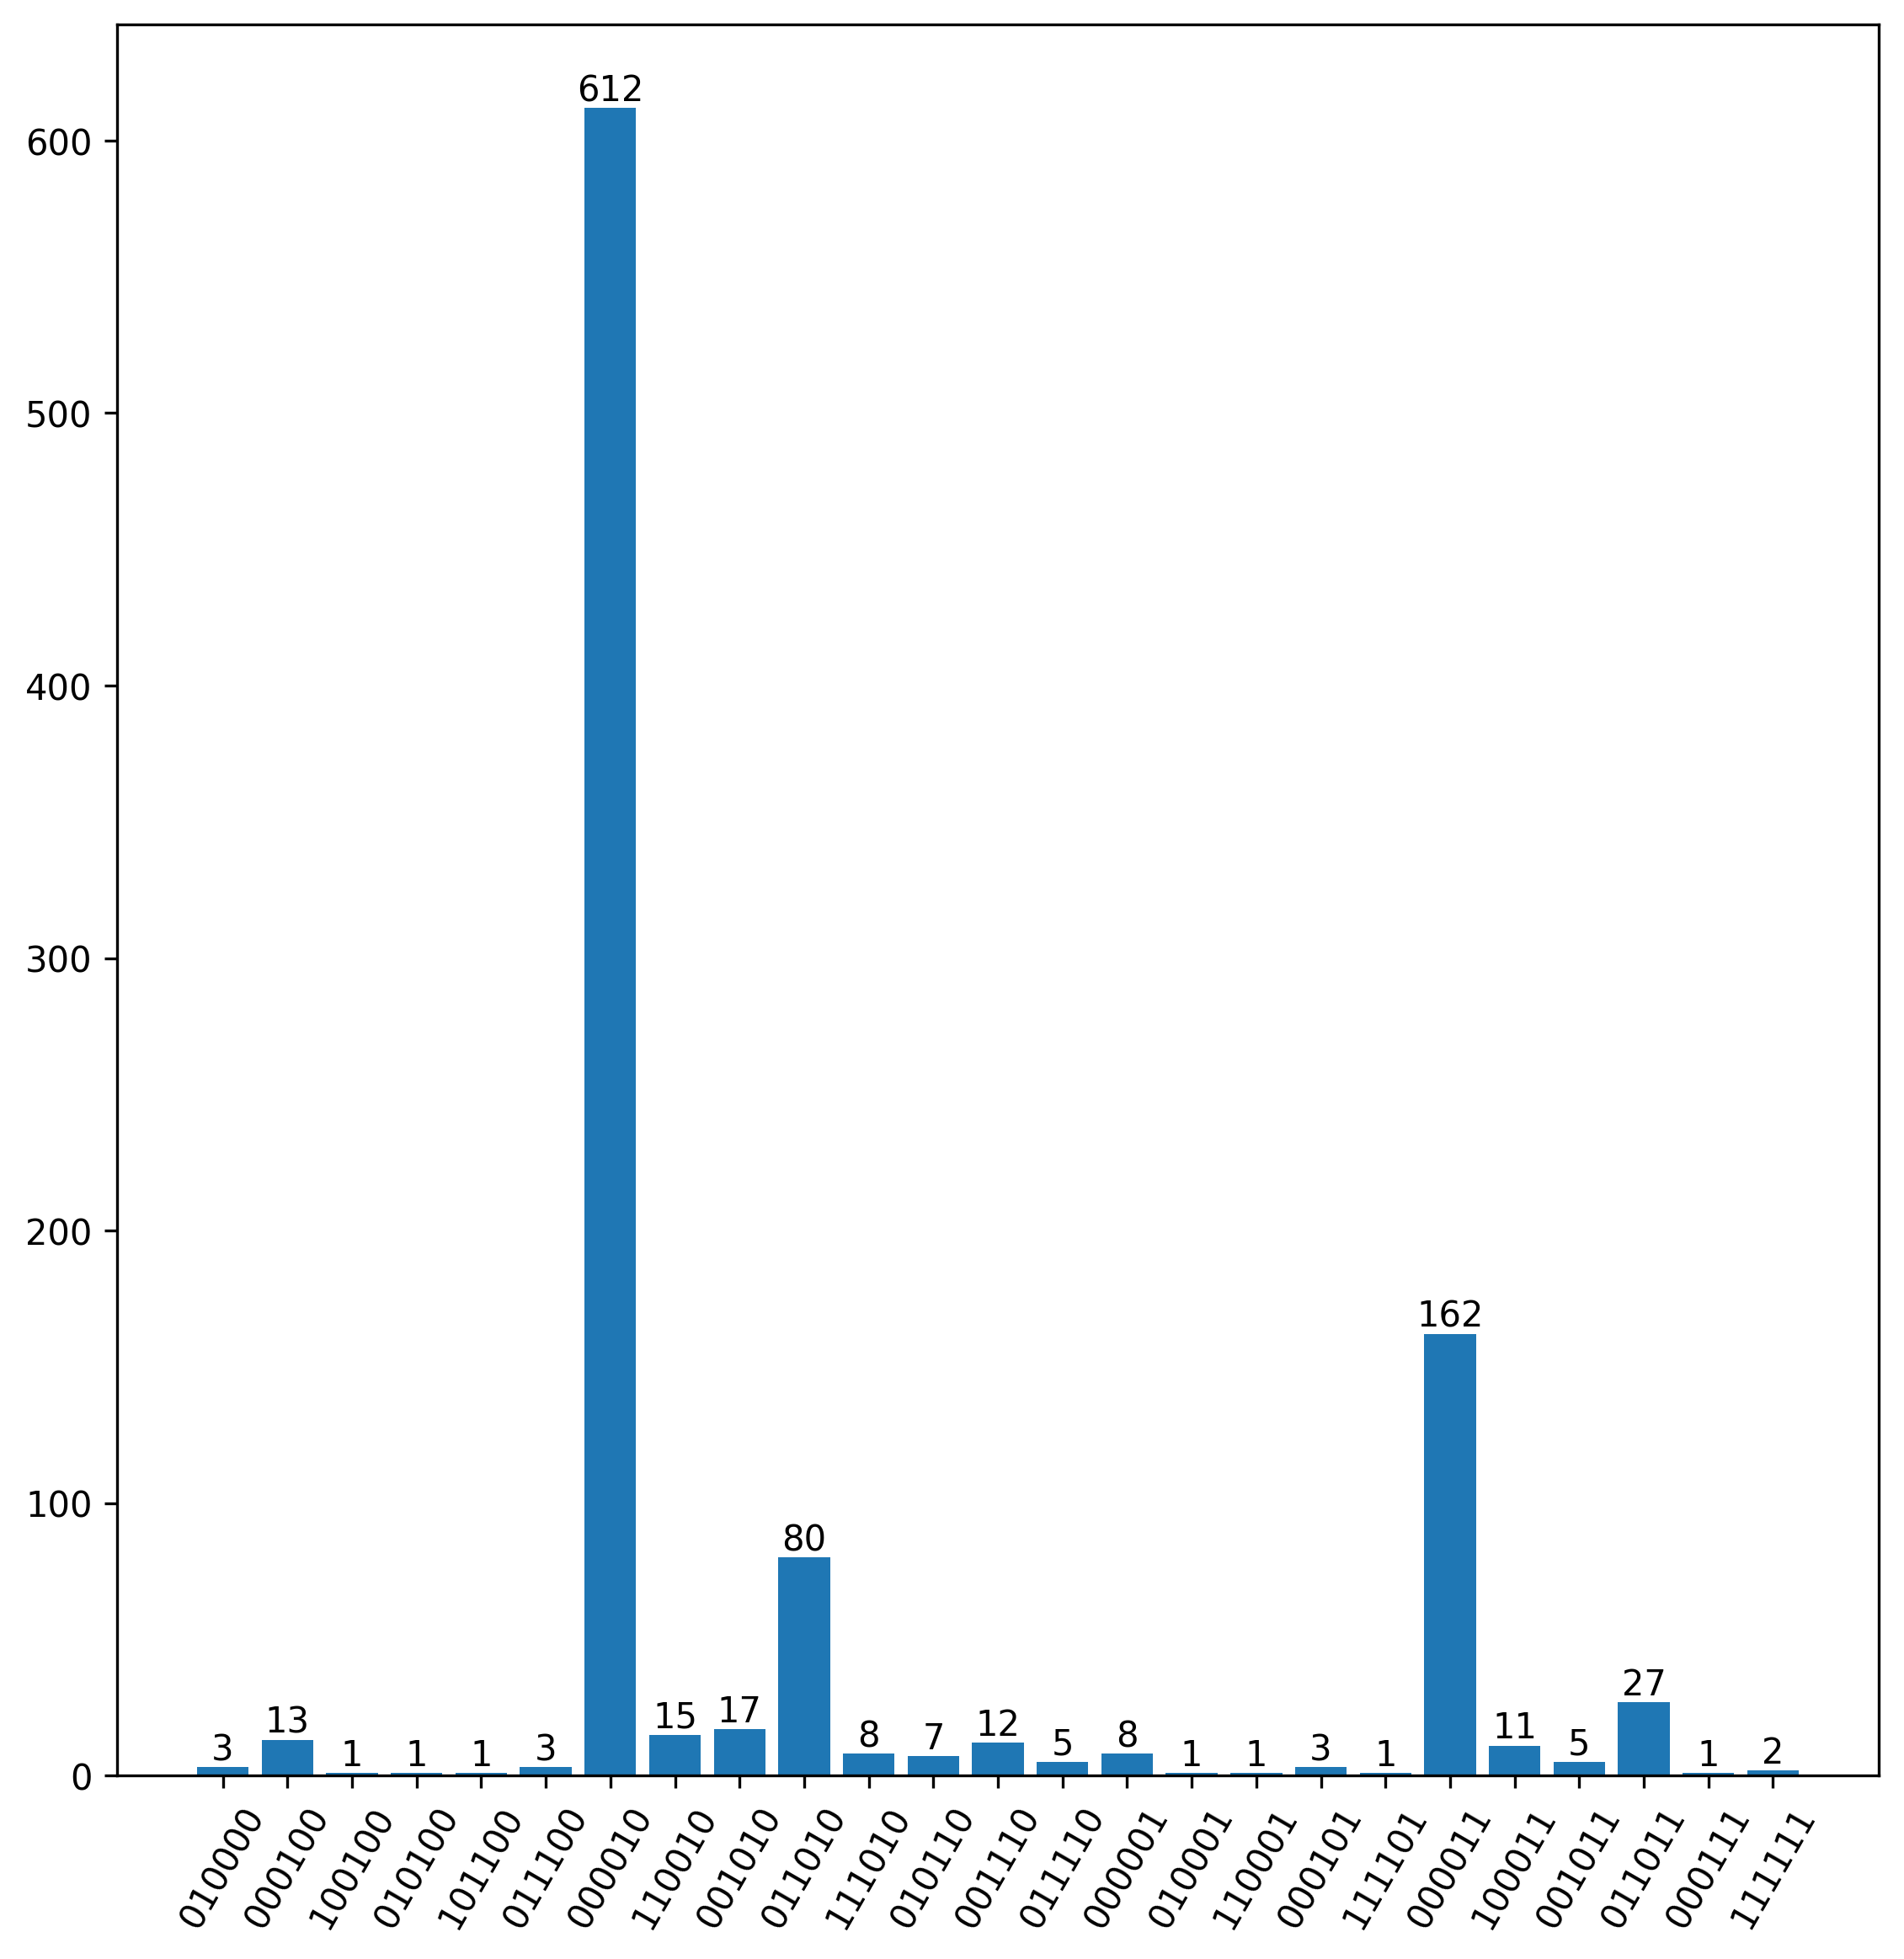

In [42]:
res_dict_6_ng = res_vqe_6_ng.counts
print(res_dict_6_ng)
plt.figure(figsize=(9,9), dpi=300)
little_endian = [s[::-1] for s in res_dict_6_ng.keys()]
counts = plt.bar(range(len(res_dict_6_ng)), list(res_dict_6_ng.values()), align='center')
plt.bar_label(counts)
plt.xticks(range(len(res_dict_6_ng)), list(little_endian), rotation=60)
plt.show()

### Results 13 qubits

In [43]:
x_13_ng = [ 6.63484684e+00,  6.11863870e+00,  6.30904267e+00,  3.05701173e+00,
       -3.62409898e-01,  6.41288168e+00,  5.54801434e-02,  3.31414400e+00,
        6.37562713e+00, -2.93067232e-05,  3.10588061e+00,  2.94141064e+00,
        4.62477133e+00,  4.15185517e+00,  7.83585238e-01,  6.42332939e-01,
       -3.58014947e-01,  2.08175728e+00,  5.22279152e+00,  4.34390953e+00,
        3.22552203e+00,  5.60424960e+00,  1.04586355e+00,  3.83195011e+00,
        1.19519883e+00, -1.40684809e-02,  5.66007931e+00,  3.00373962e+00,
        6.65992790e+00,  3.21000581e+00,  3.11279561e+00,  1.95714033e+00,
        1.46624570e-01,  2.97410844e+00,  2.98390673e+00, -1.85000044e-01,
        3.07845468e+00,  9.20817892e-02,  1.69631969e+00,  6.24702835e+00,
        9.01235792e-01, -1.99841835e-01,  5.51255882e+00,  9.00850592e-01,
        3.67729412e+00,  4.40289867e+00,  3.27519053e+00,  1.10475344e+00,
        5.47356401e+00,  5.47543287e+00,  2.29141596e+00,  3.41273632e+00]

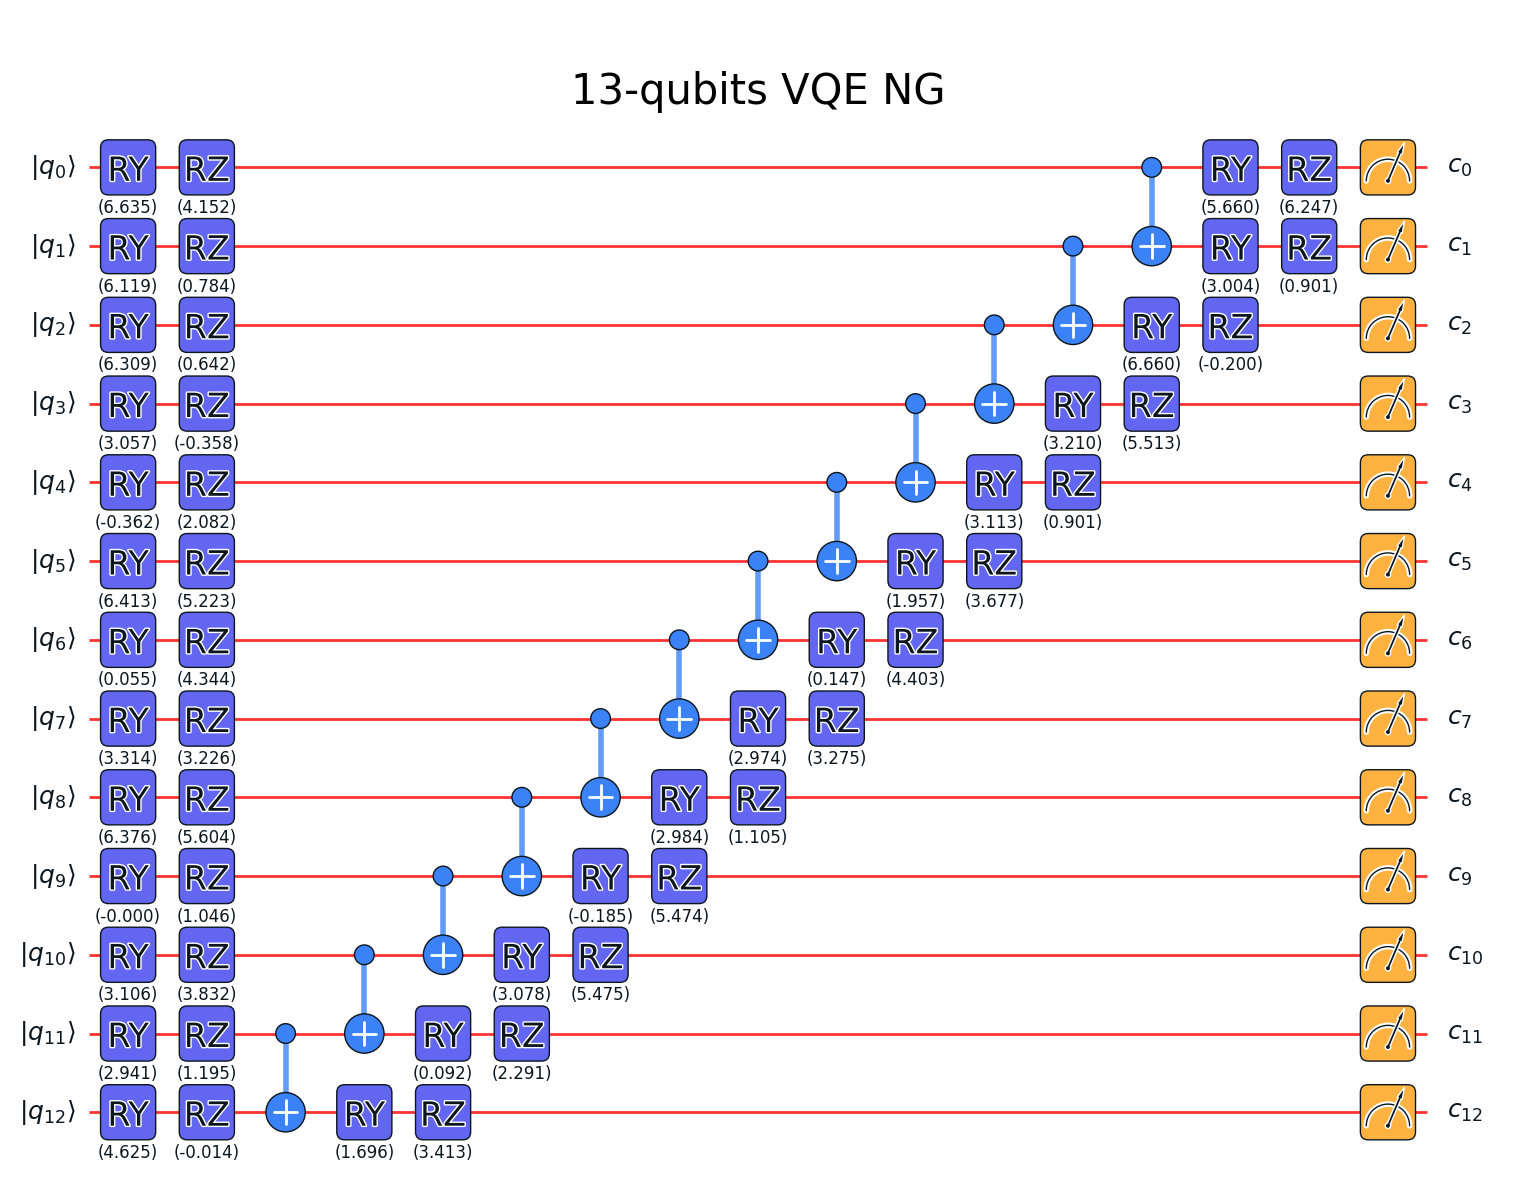

In [44]:
vqe_13_ng = pauli_z_ansatz(x_13_ng, 13)
vqe_13_ng.plot_circuit(title='13-qubits VQE NG')

#### Quantum Processor Unit (QPU)

In [45]:
available_backends = user.get_available_backends()

system_name	 qubits	 status
ScQ-P10   	 10   	 Online
ScQ-P18   	 18   	 Online
ScQ-P136  	 136  	 Online
ScQ-P102  	 102  	 Maintenance
ScQ-P10C  	 10   	 Online
ScQ-XXX   	 2    	 Offline


In [46]:
backend_name = "ScQ-P136"
task = Task()
task.config(backend=f"{backend_name}", shots=1000, compile=True)

In [47]:
job_name = f"vqe_13_ng_{backend_name}"
res_vqe_13_ng = task.send(vqe_13_ng, name=job_name, wait=True)

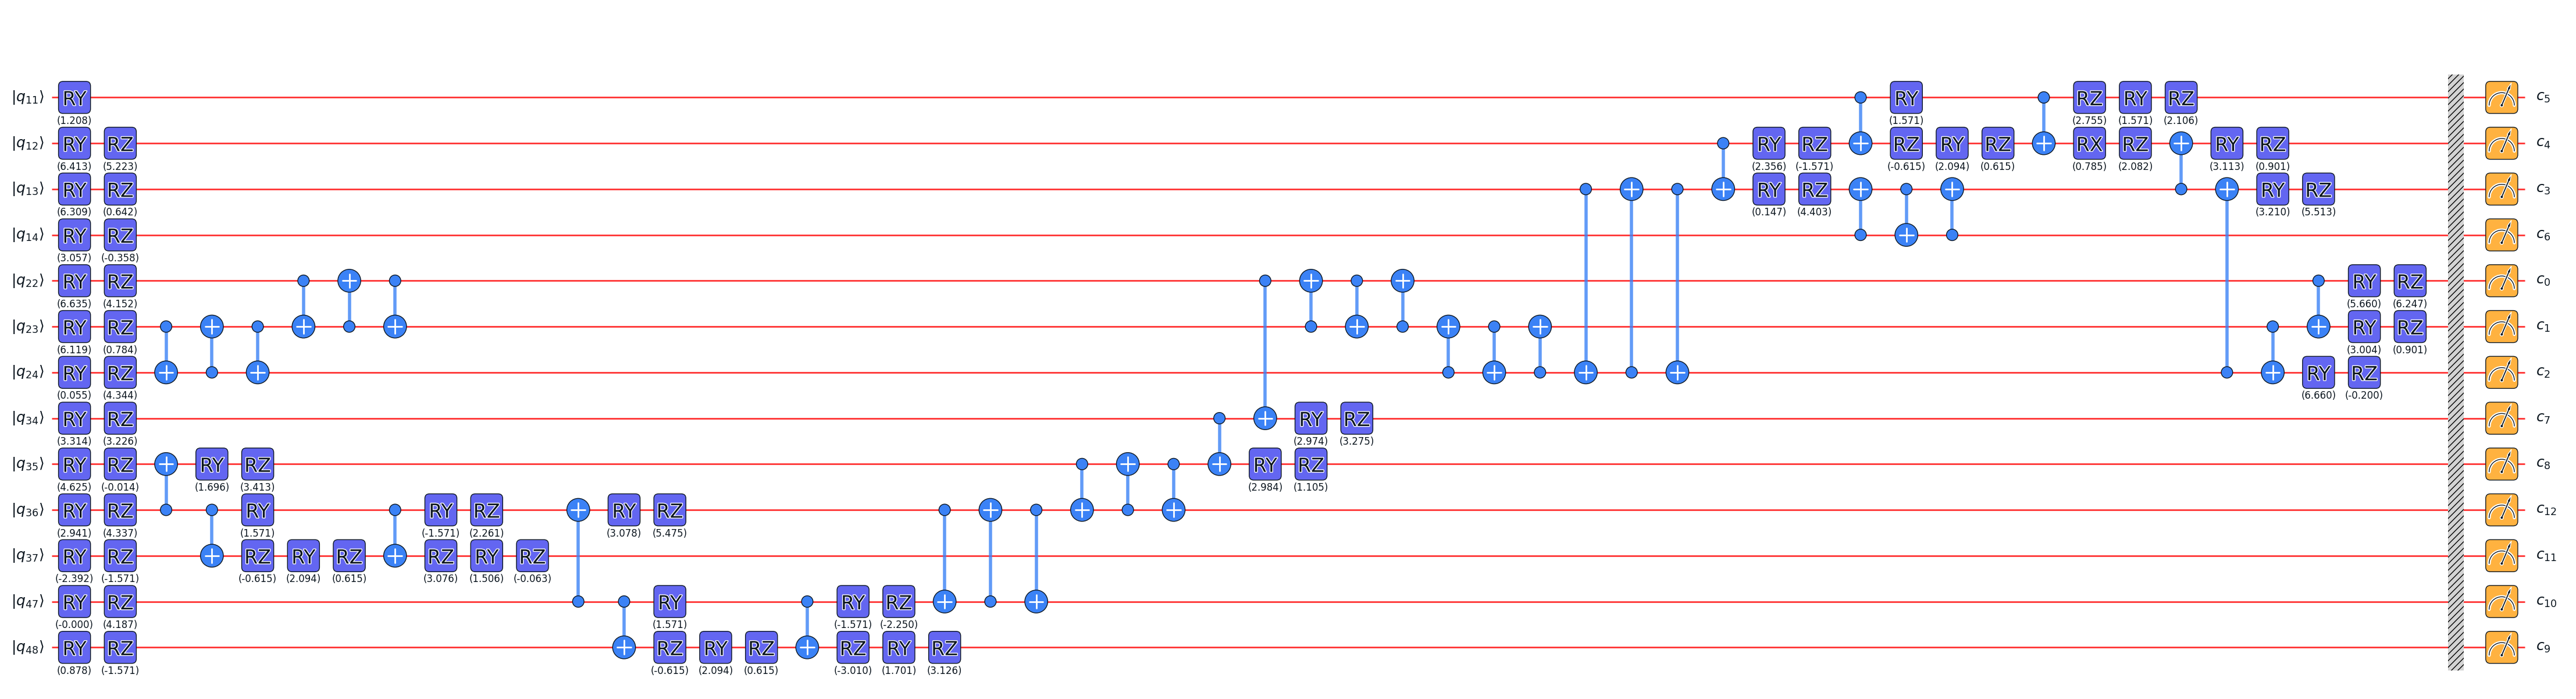

In [48]:
res_vqe_13_ng.transpiled_circuit.plot_circuit(figsize=(3,8))

In [49]:
res_dict_13_ng = res_vqe_13_ng.counts
print(res_dict_13_ng)
plt.figure(figsize=(70, 30), dpi=300)
little_endian = [s[::-1] for s in res_dict_13_ng.keys()]
counts = plt.bar(range(len(res_dict_13_ng)), list(res_dict_13_ng.values()), align='edge', width=0.5)
plt.bar_label(counts)
plt.xticks(range(len(res_dict_13_ng)), list(little_endian), rotation=88, fontsize=5)
plt.show()

OrderedDict([('0000000000100', 2), ('0000000100000', 1), ('0000001100000', 1), ('0000010000000', 1), ('0000010010000', 1), ('0000010110100', 1), ('0000010110101', 1), ('0000011000000', 2), ('0000100010001', 1), ('0000100011001', 2), ('0000100110100', 1), ('0000101000000', 1), ('0000101010101', 1), ('0000101011110', 1), ('0000101100000', 1), ('0000101110000', 1), ('0000101111100', 1), ('0000110000000', 2), ('0000110110000', 1), ('0000110111001', 1), ('0001000000111', 1), ('0001010000000', 1), ('0001011000000', 1), ('0001011110100', 1), ('0001011110110', 1), ('0001100000000', 1), ('0001101010000', 1), ('0001110000010', 1), ('0001110000101', 1), ('0001110010001', 1), ('0001111000000', 2), ('0001111010100', 1), ('0010000000000', 2), ('0010000010000', 1), ('0010000110000', 1), ('0010001000000', 1), ('0010001010000', 1), ('0010010000001', 3), ('0010010010000', 4), ('0010010100000', 1), ('0010010110000', 1), ('0010011010100', 1), ('0010011100000', 2), ('0010011110000', 1), ('0010100000000', 3

In [52]:
bit_str = sorted(res_vqe_13_ng.counts, key=res_vqe_13_ng.counts.get)
cond_solutions = dict([(j, res_vqe_13_ng.counts[j]) for j in bit_str if res_vqe_13_ng.counts[j] > 4]) 
cond_solutions

{'0100010100000': 5,
 '0100101000000': 5,
 '0101110000000': 5,
 '0111000000000': 5,
 '1100010000000': 5,
 '1110100010000': 5,
 '0101000000000': 6,
 '0100100100000': 7,
 '0100100110000': 8,
 '0100110000000': 8,
 '0100010010000': 10,
 '0100010000000': 12,
 '0110010000000': 12,
 '0100100010000': 13,
 '0110100010000': 13,
 '0100100000000': 14,
 '0110100110000': 14,
 '0110100000000': 23}

{'0100010100000': 5, '0100101000000': 5, '0101110000000': 5, '0111000000000': 5, '1100010000000': 5, '1110100010000': 5, '0101000000000': 6, '0100100100000': 7, '0100100110000': 8, '0100110000000': 8, '0100010010000': 10, '0100010000000': 12, '0110010000000': 12, '0100100010000': 13, '0110100010000': 13, '0100100000000': 14, '0110100110000': 14, '0110100000000': 23}


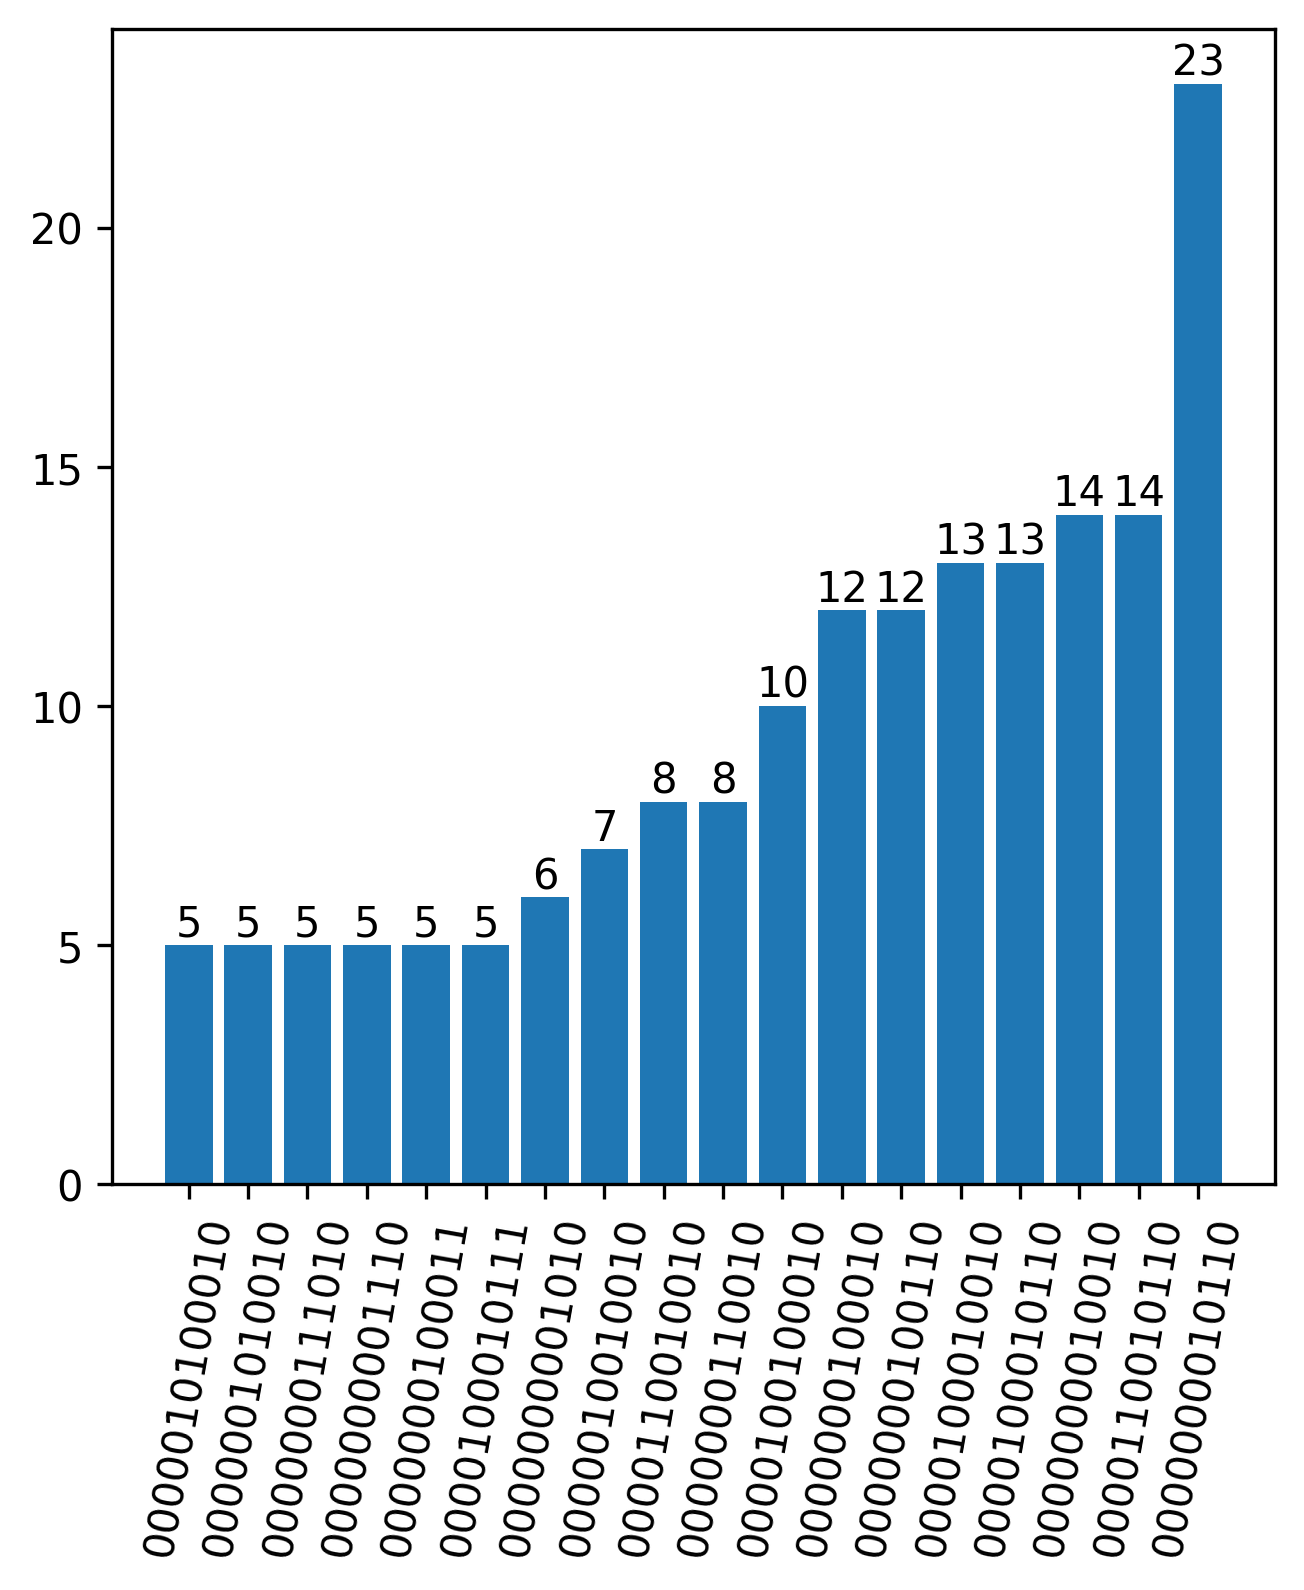

In [53]:
print(cond_solutions)
plt.figure(figsize=(5,5), dpi=300)
little_endian = [s[::-1] for s in cond_solutions.keys()]
counts = plt.bar(range(len(cond_solutions)), list(cond_solutions.values()), align='center')
plt.bar_label(counts)
plt.xticks(range(len(cond_solutions)), list(little_endian), rotation=80)
plt.show()

### Other

In [54]:
available_backends = user.get_available_backends()

system_name	 qubits	 status
ScQ-P10   	 10   	 Online
ScQ-P18   	 18   	 Online
ScQ-P136  	 136  	 Online
ScQ-P102  	 102  	 Maintenance
ScQ-P10C  	 10   	 Online
ScQ-XXX   	 2    	 Offline


In [55]:
backend_name = "ScQ-P18"
task = Task()
task.config(backend=f"{backend_name}", shots=1000, compile=True)

OrderedDict([('000', 60), ('001', 135), ('010', 44), ('011', 337), ('100', 85), ('101', 105), ('110', 25), ('111', 209)])


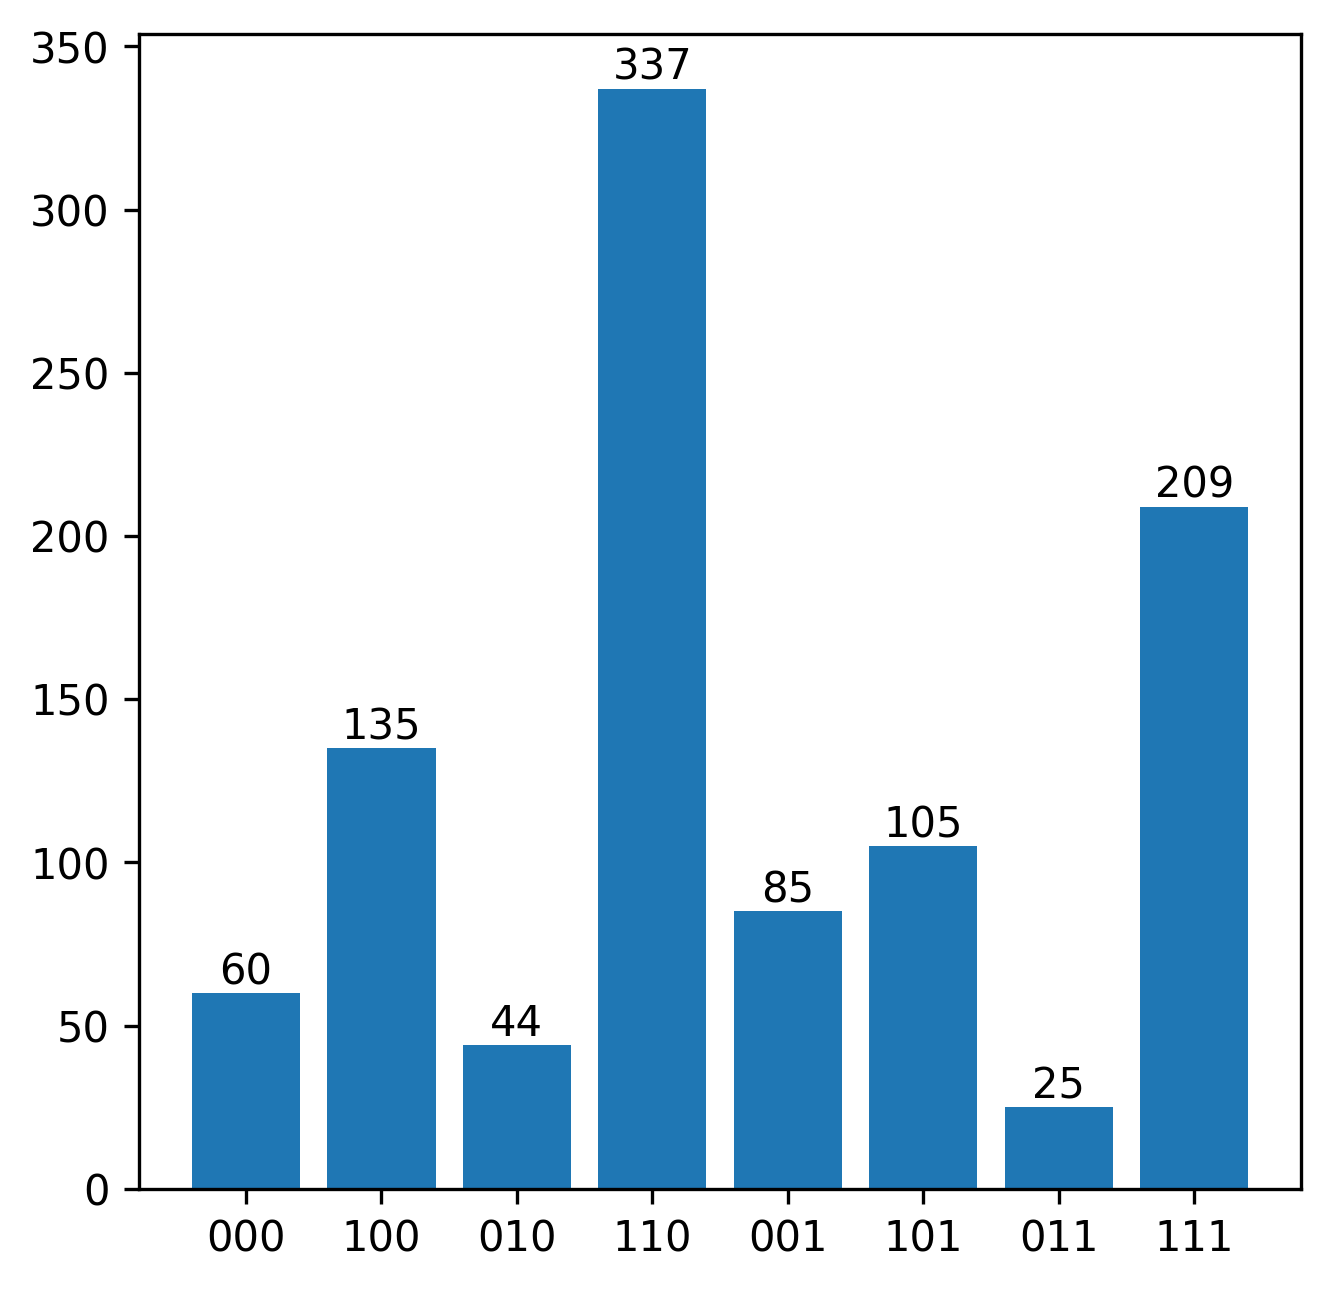

In [56]:
x_3_fd = [2.685e+00, 5.852e+00, 4.012e+00, 1.694e+00, 5.769e+00,
          4.842e+00, 1.923e+00, 1.431e+00, 5.772e+00, 4.077e+00,
          3.749e+00, 3.635e+00]

vqe_3_fd = pauli_z_ansatz(x_3_fd, 3)
job_name = f"vqe_3_fd_{backend_name}"
res_vqe_3_fd = task.send(vqe_3_fd, name=job_name, wait=True)

res_dict_3_fd = res_vqe_3_fd.counts
print(res_dict_3_fd)
plt.figure(figsize=(5,5), dpi=300)
little_endian = [s[::-1] for s in res_dict_3_fd.keys()]
counts = plt.bar(range(len(res_dict_3_fd)), list(res_dict_3_fd.values()), align='center')
plt.bar_label(counts)
plt.xticks(range(len(res_dict_3_fd)), list(little_endian))
plt.show()

OrderedDict([('000', 50), ('001', 774), ('010', 19), ('011', 86), ('100', 8), ('101', 16), ('110', 5), ('111', 42)])


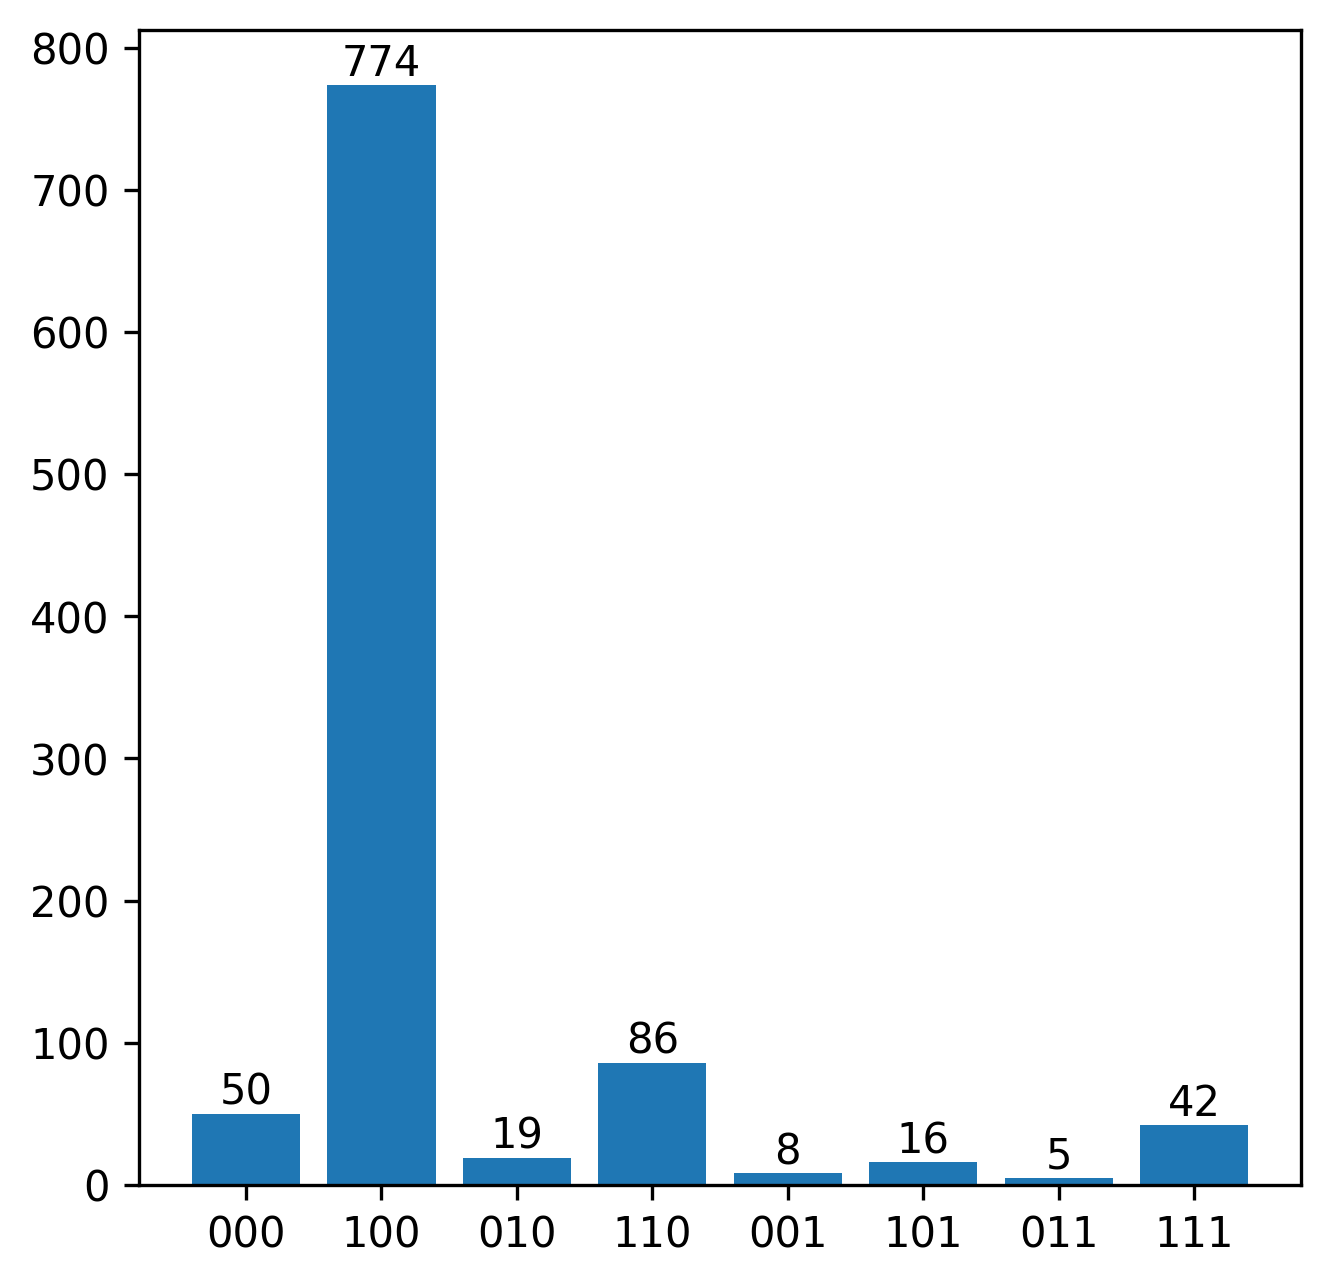

In [57]:
x_3_ng = [3.170e+00, 6.293e+00, 3.915e+00, 8.057e-01, 5.109e+00,
          6.536e+00, 3.309e+00, 2.804e+00, 5.502e+00, 3.952e+00,
          3.765e+00, 3.243e+00]

vqe_3_ng = pauli_z_ansatz(x_3_ng, 3)
job_name = f"vqe_3_ng_{backend_name}"
res_vqe_3_ng = task.send(vqe_3_ng,name=job_name, wait=True)

res_dict_3_ng = res_vqe_3_ng.counts
print(res_dict_3_ng)
plt.figure(figsize=(5,5), dpi=300)
little_endian = [s[::-1] for s in res_dict_3_ng.keys()]
counts = plt.bar(range(len(res_dict_3_ng)), list(res_dict_3_ng.values()), align='center')
plt.bar_label(counts)
plt.xticks(range(len(res_dict_3_ng)), list(little_endian))
plt.show()